# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [1]:
!pip install palmerpenguins
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from palmerpenguins import load_penguins

In [2]:
df = load_penguins()
pd.get_dummies(df)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [4]:
cat_features = ["species", "island", "sex"]
df = pd.get_dummies(df,columns=cat_features,drop_first=True)
df["sex_male"] = df["sex_male"].map({True: 1, False: 0})
df["species_Chinstrap"] = df["species_Chinstrap"].map({True: 1, False: 0})
df["species_Gentoo"] = df["species_Gentoo"].map({True: 1, False: 0})
df["island_Dream"] = df["island_Dream"].map({True: 1, False: 0})
df["island_Torgersen"] = df["island_Torgersen"].map({True: 1, False: 0})
df

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_male
0,39.1,18.7,181.0,3750.0,2007,0,0,0,1,1
1,39.5,17.4,186.0,3800.0,2007,0,0,0,1,0
2,40.3,18.0,195.0,3250.0,2007,0,0,0,1,0
3,NaN,NaN,NaN,NaN,2007,0,0,0,1,0
4,36.7,19.3,193.0,3450.0,2007,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2009,1,0,1,0,1
340,43.5,18.1,202.0,3400.0,2009,1,0,1,0,0
341,49.6,18.2,193.0,3775.0,2009,1,0,1,0,1
342,50.8,19.0,210.0,4100.0,2009,1,0,1,0,1


Let"s use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [5]:
df = df.dropna(subset=["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"])
df

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_male
0,39.1,18.7,181.0,3750.0,2007,0,0,0,1,1
1,39.5,17.4,186.0,3800.0,2007,0,0,0,1,0
2,40.3,18.0,195.0,3250.0,2007,0,0,0,1,0
4,36.7,19.3,193.0,3450.0,2007,0,0,0,1,0
5,39.3,20.6,190.0,3650.0,2007,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2009,1,0,1,0,1
340,43.5,18.1,202.0,3400.0,2009,1,0,1,0,0
341,49.6,18.2,193.0,3775.0,2009,1,0,1,0,1
342,50.8,19.0,210.0,4100.0,2009,1,0,1,0,1


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

In [15]:
X = df[["bill_length_mm"]]
y = df[["bill_depth_mm"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lr = LinearRegression()
lr.fit(X_train, y_train)
train_pred1 = lr.predict(X_train)
test_pred1 = lr.predict(X_test)
train_rmse1 = root_mean_squared_error(y_train, train_pred1)
test_rmse1 = root_mean_squared_error(y_test, test_pred1)

In [17]:
X = pd.concat([df["bill_length_mm"], df["flipper_length_mm"]], axis=1)
y = df[["bill_depth_mm"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lr = LinearRegression()
lr.fit(X_train, y_train)
train_pred2 = lr.predict(X_train)
test_pred2 = lr.predict(X_test)
train_rmse2 = root_mean_squared_error(y_train, train_pred2)
test_rmse2 = root_mean_squared_error(y_test, test_pred2)

In [18]:
X = pd.concat([df["bill_length_mm"], df["flipper_length_mm"], df["body_mass_g"]], axis=1)
y = df[["bill_depth_mm"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lr = LinearRegression()
lr.fit(X_train, y_train)
train_pred3 = lr.predict(X_train)
test_pred3 = lr.predict(X_test)
train_rmse3 = root_mean_squared_error(y_train, train_pred3)
test_rmse3 = root_mean_squared_error(y_test, test_pred3)

In [19]:
X = pd.concat([df["bill_length_mm"], df["flipper_length_mm"], df["body_mass_g"], df["sex_male"]], axis=1)
y = df[["bill_depth_mm"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lr = LinearRegression()
lr.fit(X_train, y_train)
train_pred4 = lr.predict(X_train)
test_pred4 = lr.predict(X_test)
train_rmse4 = root_mean_squared_error(y_train, train_pred4)
test_rmse4 = root_mean_squared_error(y_test, test_pred4)

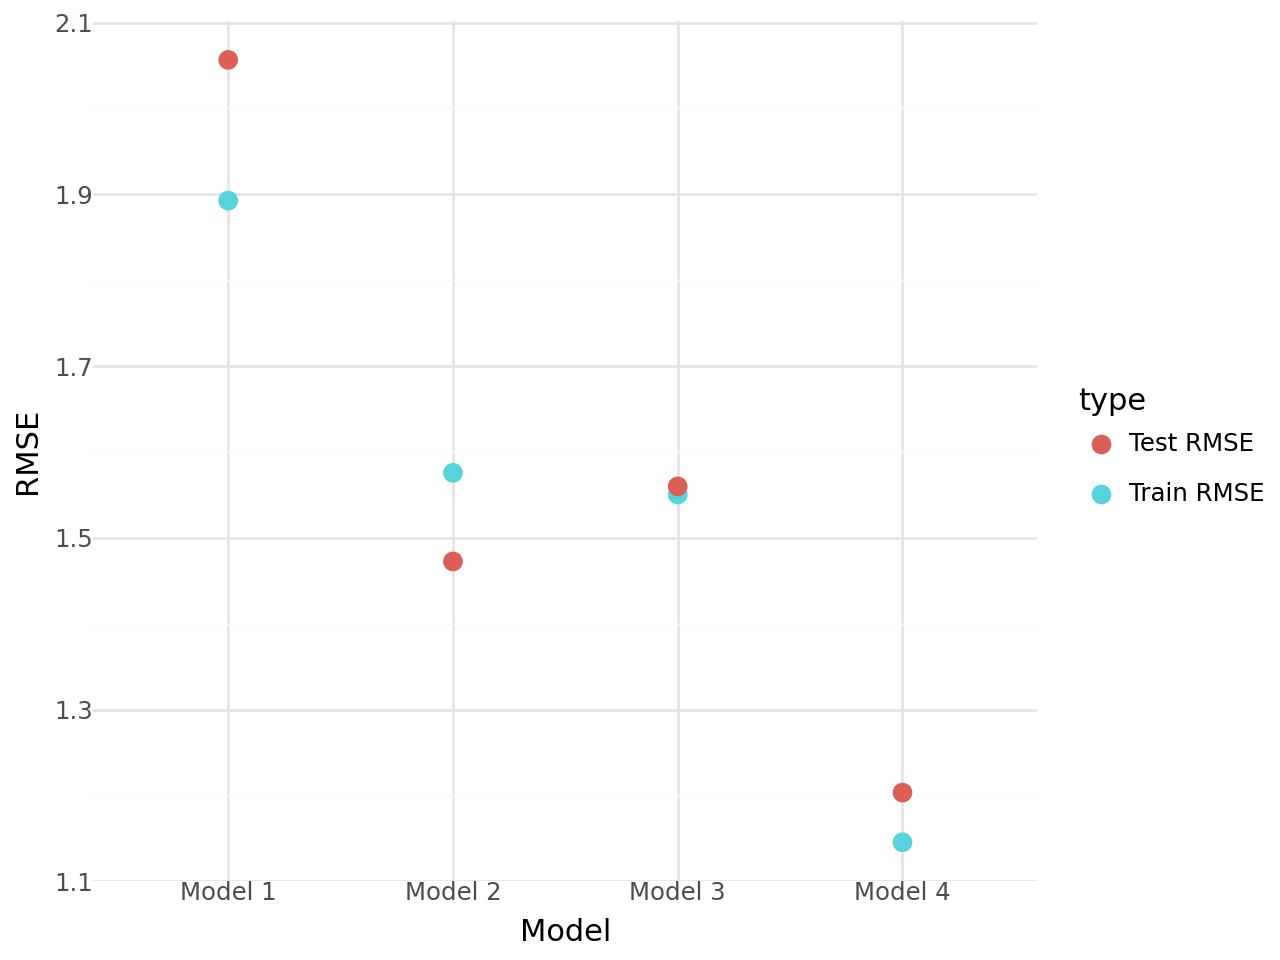

In [ ]:
import plotnine as p9
df_error = pd.DataFrame({
    "Model": ["Model 1", "Model 2", "Model 3", "Model 4"],
    "Train RMSE": [train_rmse1, train_rmse2, train_rmse3, train_rmse4],
    "Test RMSE": [test_rmse1, test_rmse2, test_rmse3, test_rmse4]
})

df_error_long = df_error[["Model", "Train RMSE", "Test RMSE"]].melt(id_vars=["Model"], value_name="RMSE", var_name="type")

(p9.ggplot(df_error_long, p9.aes(x="Model", y="RMSE", color="type")) +
 p9.geom_point() +
 p9.theme_minimal())